# Supervised Learning - Class 6

## 0. Import Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

import numpy as np
import pandas as pd
from sklearn.linear_model import  LogisticRegression
import statsmodels.api as sm

np.random.seed(0)

## 1. Example of supervised learning with classification

### Example 1: Disease Diagnosis Clasification with specific biomarkers

Generating synthetic data for illustration

In [2]:
# Features: Systolic Blood Pressure and Total Cholesterol Level
X = np.random.randn(100, 2) * [20, 50] + [120, 200]
# Labels: 0 for no disease, 1 for disease
y = (X[:, 0] + X[:, 1] > 300).astype(int)

Plotting the data points pairs (Systolic Blood Pressure -Total Cholesterol Level)

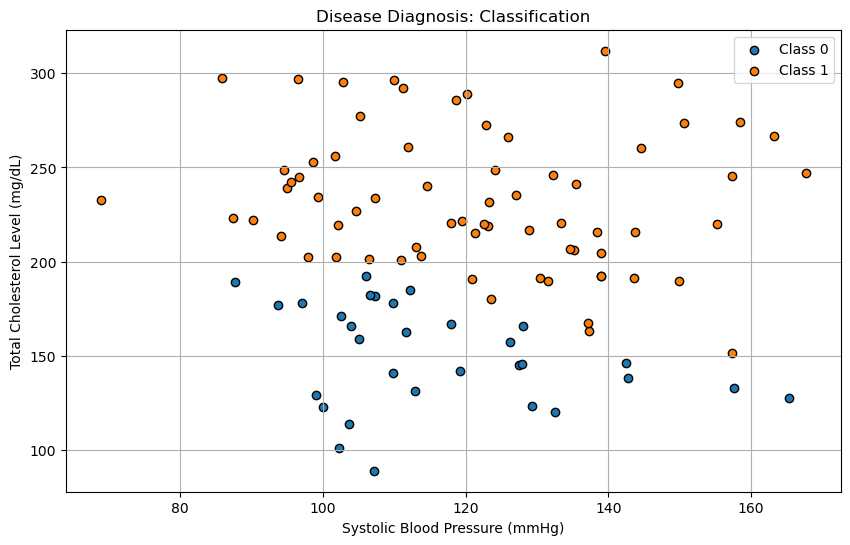

In [3]:
# Plotting the data points
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}', edgecolor='k')

plt.title('Disease Diagnosis: Classification')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Total Cholesterol Level (mg/dL)')
plt.legend()
plt.grid(True)
plt.show()

Adding a decision Boundary

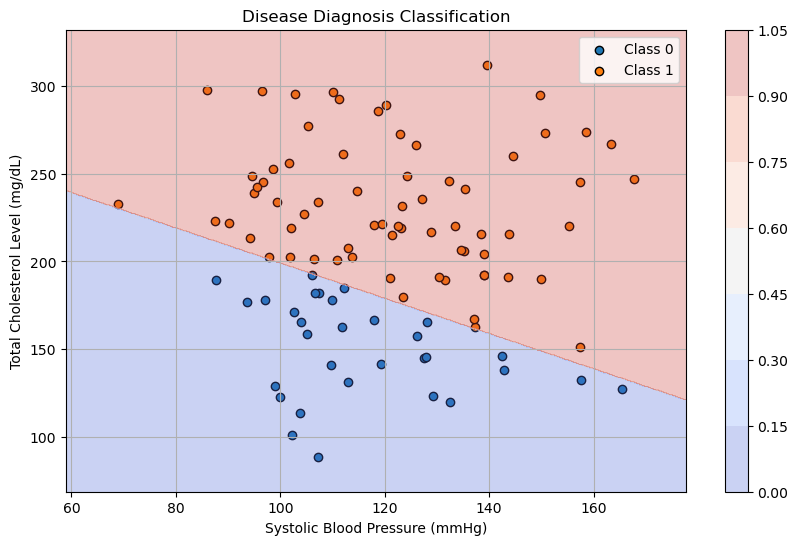

In [4]:
# Plotting the data points with the decision boundary
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}', edgecolor='k')

# Logistic regression model for learning the decision boundary
model = LogisticRegression()
model.fit(X, y)

# Decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-10, X[:, 0].max()+10, 500),
                     np.linspace(X[:, 1].min()-20, X[:, 1].max()+20, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.colorbar()

plt.title('Disease Diagnosis Classification')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Total Cholesterol Level (mg/dL)')
plt.legend()
plt.grid(True)
plt.show()